# Chapter 14.  USA.gov data from bit.ly (URL shortening service)

A feed of anonymous data gathered from users who shorten links ending with .gov or .mil.<br/>

.gov (government) - the United States Federal Government; e.g. New York State: http://www.ny.gov <br/>
.mil (military) - the United States Department of Defense; e.g. US Navy: http://www.navy.mil <br/>



Errata url: http://www.oreilly.com/catalog/errata.csp?isbn=0636920023784 <br/>

USA.gov data feeds and APIs - no longer available (http://usa.gov/About/developer-resources/lusagov.shtml)

In [77]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

### bit.ly data is in JSON format
Import json module in order to convert JSON string to Python dictionary for each line of our data feed.

In [78]:
import json

### Read and display the first line of JSON data feed

In [79]:
path = "../data/usagov_bitly_data2012-03-16-1331923249.txt"

file = open(path, 'r')

print (file.readline())
print (file.readline())
print (file.readline())

file.close()

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }

{ "a": "GoogleMaps\/RochesterNY", "c": "US", "nk": 0, "tz": "America\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\/\/www.AwareMap.com\/", "u": "http:\/\/www.monroecounty.gov\/etc\/911\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }

{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; Inf

### Create a list of dictionaries with the help of list comprehensions.
For each line of our data feed, load JSON string into Python dictionary and add that dictionary to the list.

In [80]:
records = [json.loads(line) for line in open(path)]

#records is a list of dictionaries
type(records), type(records[0])

(list, dict)

In [81]:
#the first record
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Access the first timezone
First list element, dictionary key 'tz'

In [82]:
records[0]['tz']

'America/New_York'

### Create a DataFrame object.
Recall that our JSON data feed was loaded into a list of Python dictionaries, <i>records</i>.

In [83]:
df = DataFrame(records)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [85]:
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


### Display the first ten time zones

In [86]:
df['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

### Display the top ten time zones

In [87]:
tz_counts = df['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

### Replace <i>NA / NaN</i> values with a string 'Missing'.

In [88]:
clean_tz = df['tz'].fillna('Missing')

### Replace empty strings with a string 'Unknown'. 
With the help of boolean array indexing:

In [89]:
clean_tz [clean_tz == ''] = 'Unknown'

### Recalculate the number of time zones.
The new list includes 'Missing' and 'Unknown' time zones.

In [90]:
tz_counts = clean_tz.value_counts()

In [91]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

### Create a horizontal bar plot

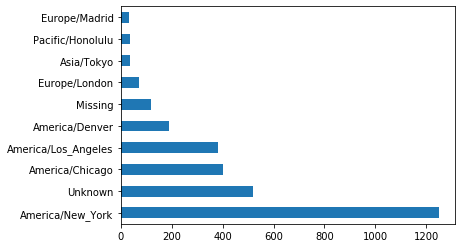

In [92]:
%matplotlib inline
tz_counts[:10].plot(kind="barh")

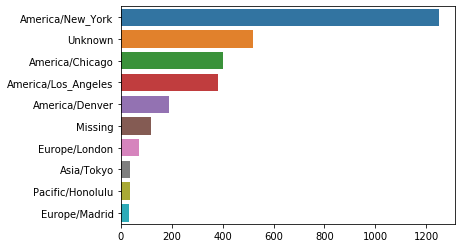

In [93]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

## Top application names derived from user agent strings.
### Example values of "agent" strings.  
User agent strings contain information about the browser, device or application used to perform the URL shortening.

In [94]:
df['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [95]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [96]:
df['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [97]:
df['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

### Split off application name - the first token in the user agent string
  
The split() method breaks up a string at the specified separator and returns a list of strings.  If the separator is not specified, any whitespace (space, newline etc.) string is a separator.

In [98]:
my_string = 'a b c d efg'
my_string.split()

['a', 'b', 'c', 'd', 'efg']

In [99]:
'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'.split()

['Mozilla/5.0',
 '(Windows',
 'NT',
 '5.1;',
 'rv:10.0.2)',
 'Gecko/20100101',
 'Firefox/10.0.2']

In [100]:
results = Series([x.split()[0] for x in df['a'].dropna()])

In [101]:
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

### Display top 8 application names and their counts

In [102]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

### Decompose the top time zones into Windows and non-Windows users.
Exclude missing agents from the data.

In [103]:
df.a.notnull().head()

0    True
1    True
2    True
3    True
4    True
Name: a, dtype: bool

In [104]:
clean_df = df[df.a.notnull()]

### A user is on Windows if the string 'Windows' is in the agent string.  

Series and Index are equipped with a set of **string processing** methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the **str attribute** and generally have names matching the equivalent (scalar) built-in string methods: ***lower(), upper(), len()***
https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [105]:
operating_system = np.where(clean_df['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:10]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [106]:
len(operating_system)

3440

### Group the data by its time zone column and this new list of operating systems

In [107]:
by_tz_os = clean_df.groupby(['tz', operating_system])

In [108]:
# The group counts are computed using size(), analalogous to the value_counts function.


agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(10)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


### Select the top overall time zones.  

To do so, construct an indirect index array from the row counts in agg_counts.  
  
***pandas.Series.sum*** returns the sum of the values for the requested axis  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html

In [109]:
agg_counts.sum(axis=1)[:10]

tz
                                  521.0
Africa/Cairo                        3.0
Africa/Casablanca                   1.0
Africa/Ceuta                        2.0
Africa/Johannesburg                 1.0
Africa/Lusaka                       1.0
America/Anchorage                   5.0
America/Argentina/Buenos_Aires      1.0
America/Argentina/Cordoba           1.0
America/Argentina/Mendoza           1.0
dtype: float64

In [110]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]
#agg_counts.sum(1).index.get_loc('America/New_York')

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

### Use take() to select the rows in that order, then slice off the last 10 rows:

In [111]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


### One more horizontal bar plot where stacked = True

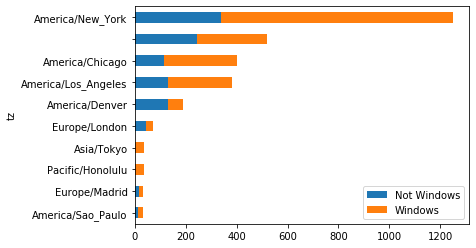

In [112]:
count_subset.plot(kind='barh', stacked=True)

### Percentage Windows and non-Windows users in top-occurring time zones

In [113]:
count_subset[:10]

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [114]:
normed_subset = count_subset.div(count_subset.sum(axis=1), axis=0)
normed_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.393939,0.606061
Europe/Madrid,0.457143,0.542857
Pacific/Honolulu,0.000000,1.000000
Asia/Tokyo,0.054054,0.945946
Europe/London,0.581081,0.418919
America/Denver,0.691099,0.308901
America/Los_Angeles,0.340314,0.659686
America/Chicago,0.287500,0.712500
,0.470250,0.529750


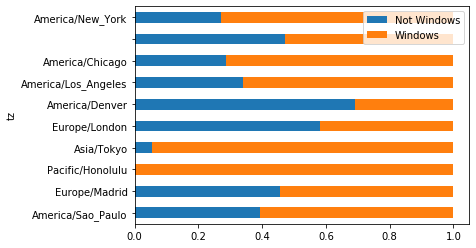

In [115]:
normed_subset.plot(kind='barh', stacked=True)